In [1]:
import os

path_img_image = '/content/drive/MyDrive/Data/AIFFEL/exp05_06/img/junghyun.jpeg' # 이미지 경로 지정
model_path = '/content/drive/MyDrive/Data/AIFFEL/exp05_06/models/shape_predictor_68_face_landmarks.dat'
sticker_path = '/content/drive/MyDrive/Data/AIFFEL/exp05_06/img/cat-whiskers.png' # 수염 이미지의 경로

In [2]:
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리

img_bgr = cv2.imread(path_img_image)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

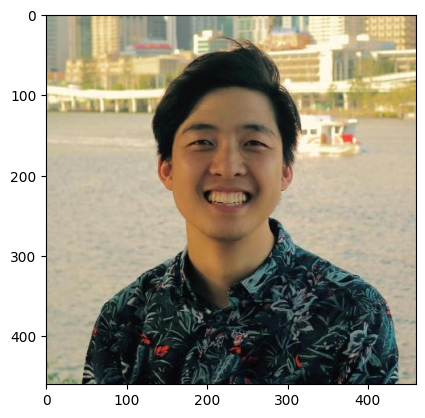

In [3]:
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # BGR 2 RGB
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)


In [4]:
import dlib

# detector를 선언하고, bounding box 추출
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # 얼굴 위치 좌표 (image, num of image pyramid)

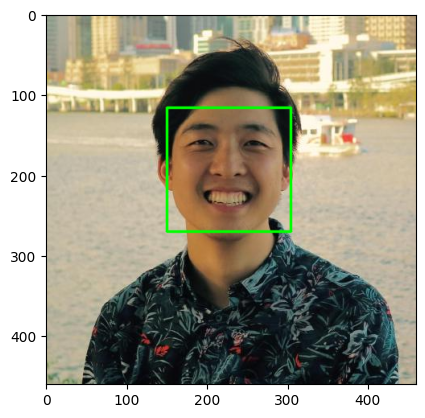

In [5]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [7]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


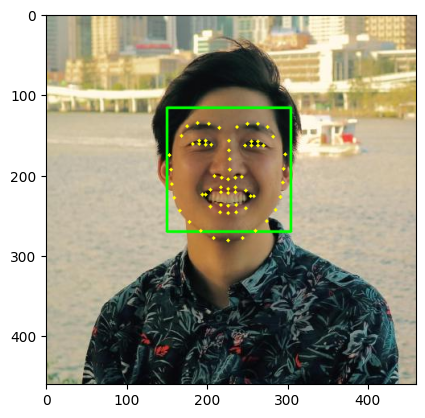

In [8]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(x,y) : (226,128)
(w,h) : (155,155)


In [10]:
img_sticker = cv2.imread(sticker_path, -1) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape) # 사이즈를 조정한 스티커 이미지의 차원 확인

(155, 155, 3)


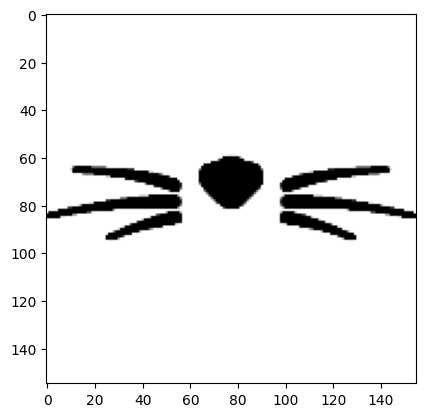

In [11]:

plt.imshow(img_sticker)
plt.show()

In [12]:
# 이미지 시작점으로부터 x, y 좌표 조정

refined_x = x - w // 2
refined_y = y

In [13]:
import numpy as np
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker > 0, sticker_area, img_sticker).astype(np.uint8)

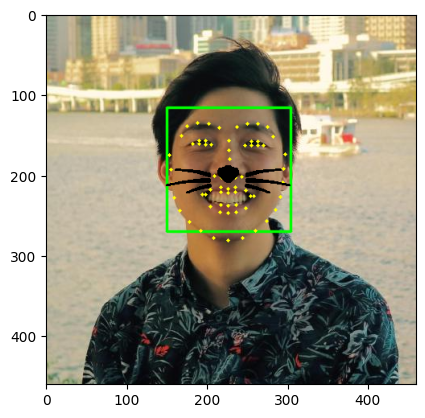

In [14]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

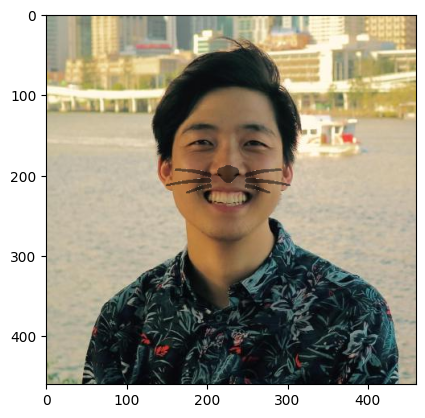

In [15]:
# 수염 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 흰색 배경을 감지
threshold = 240
white_mask = np.all(img_sticker > threshold, axis=-1)

# 흰색이 아닌 부분에서 원본 이미지와 스티커 이미지를 가중치를 이용해 합침
blended_area = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.5, 0)
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(white_mask[..., None], sticker_area, blended_area)

# 결과를 표시
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


# 회고
학습 노드에서 사용했던 이미지와 달리 수염파일의 경우는 투명한 부분과 그렇지 않은 부분이 뒤집혀서 출력되는 문제가 있었다. GPT의 도움으로 알파값을 받은 후에 채널을 재합성하는 식으로 파일을 재처리하였지만, 정확히 어떤 문제인지 이미지 포맷에 대한 학습을 충분히 하지는 않았다.

얼굴 크기가 바뀌더라도 모델이 잘 작동한다면 그에 맞게 수염의 크기는 수정될 것이다.
하지만 측면 얼굴만 나온다면 그에 맞게 수염도 기울어져 있어야 하는데 그것이 적용되는 부분까지는 구현하지 않았다.

빛의 밝기나 배경의 영향을 받는 경우도 있을까?

이 과제의 목적은 크게는 얼굴인식 모델이 잘 작동하는지를 보는 것이지만, 스티커 앱이라는 구체적인 서비스 수준의 기능 구현을 위해서는 고려해야 할 부분이 많다는 점을 느꼈다.

이와 같은 '고려해야 할 부분'을 모델이 모두 처리해줄 수도 있을텐데, 그 경우에는 모델을 찾는 것이 빠를까 아니면 기존 모델을 고치는 것이 나을까?

그 이전에 스티커를 붙이는 것과 같은 서비스를 구현하는 것이 목표인가? 그것이 아니라면 이런 모델이 있고, 어떻게 작동하고, 무엇을 고려해야 하는지를 간접적으로 학습한 것으로도 충분히 의미가 있었던 작업이었다.